# MDI220
# Statistiques

# Mini-project

Ce mini-projet est pour le cours Statistiques MDI220.

Vous devez remplir ce notebook et le uploader sur eCampus, **avec les figures**. S'il vous plaît, assurez-vous que le notebook s'execute **sans erreurs**.

Vous pouvez accomplir ce projet en français ou en anglais (votre préférence).

Vous pouvez travailler en equipe, mais le notebook final, compris le texte et le code, doit être **votre propre**. Plagiat entre les étudiants est strictement interdit.

S'il vous plaît, donner **la réponse concise** et **le code concis**, avec des commentaires ou approprié.

(Re)nommer le fichier de ce notebook dans le format suivant : "NOM_Prenom_projet_MDI220.ipynb".

## Votre nom:

## Imports

S'il vous plaît, **n'importez pas** d'autres librairies.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from scipy.stats import norm, chi2, gaussian_kde, t

In [ ]:
import seaborn as sns

## Données

Nous considérons les données de **consomation quotidienne d'electricité** (en MW) en France dans le période 2013-2023. Les données sont accessibles sur **eCampus**.

Les informationnes détaillées sur les données sont accessible [ici](https://www.data.gouv.fr/fr/datasets/consommation-quotidienne-brute-regionale/).

In [ ]:
# do not modify this cell
filename = 'power_consumption.csv'
df = pd.read_csv(filename)

In [ ]:
#afficher les 5 premières lignes du fichier power_consuption.csv
#on peut afficher les x premières lignes en faisant head(x)
df.head()

,region,date,consumption
0,Auvergne-Rhône-Alpes,2013-01-01,7560
1,Auvergne-Rhône-Alpes,2013-01-02,8700
2,Auvergne-Rhône-Alpes,2013-01-03,9367
3,Auvergne-Rhône-Alpes,2013-01-04,9133
4,Auvergne-Rhône-Alpes,2013-01-05,8283


In [ ]:
#liste les régions

regions = list(df.region.unique())

In [ ]:
regions

['Auvergne-Rhône-Alpes',
 'Bourgogne-Franche-Comté',
 'Bretagne',
 'Centre-Val de Loire',
 'Grand Est',
 'Hauts-de-France',
 'Normandie',
 'Nouvelle-Aquitaine',
 'Occitanie',
 'Pays de la Loire',
 "Provence-Alpes-Côte d'Azur",
 'Île-de-France']

In [ ]:
# average consumption per region
df[["region", "consumption"]].groupby("region").mean().astype(int)

,consumption
region,
Auvergne-Rhône-Alpes,7495
Bourgogne-Franche-Comté,2416
Bretagne,2546
Centre-Val de Loire,2139
Grand Est,5155
Hauts-de-France,5726
Normandie,3168
Nouvelle-Aquitaine,4925
Occitanie,4266


In [ ]:
# average consumption in France (MW)
df[["region", "consumption"]].groupby("region").mean().sum().astype(int)

consumption    53582
dtype: int64

In [ ]:
# selection of a region
region = "Bretagne"
df_region = df[df.region == region]

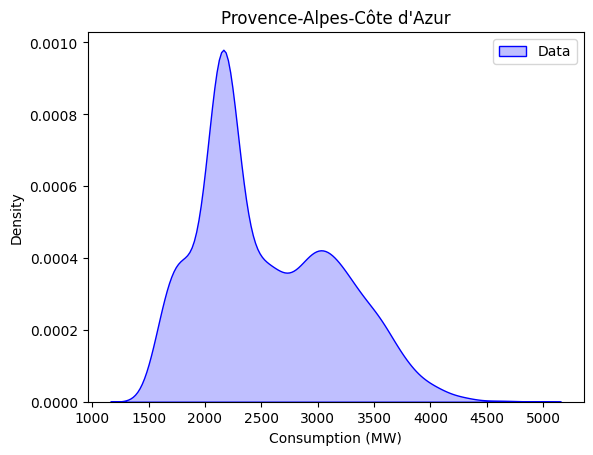

In [ ]:
# density (with kde = kernel density estimation)
sns.kdeplot(data=df_region, x="consumption", label="Data", color='blue', fill=True)
plt.title(region)
plt.xlabel("Consumption (MW)")
plt.legend()
plt.show()

## A. Estimation ponctuelle

Dans l'entité du projet, consomation quotidienne d'electricité est supposée i.i.d., avec la distribution gaussienne.

Nous allons utiliser les estimateurs suivants pour la moyenne et la variance, pour $n$ observations $x_1,\ldots,x_n$ :
$$
\hat \mu = \frac 1 n \sum_{i=1}^n x_i\quad \hat{\sigma^2} = \frac 1 {n-1}\sum_{i=1}^n (x_i - \hat \mu)^2
$$
L'estimateur correspondant de l'écart-type est :
$$
\hat \sigma = \sqrt{\hat{\sigma^2}}
$$

Considérons la region Bretagne.

1. Montrez que les estimateur pour la moyenne et la variance sont sans biais.

Votre réponse :

On a $\mathbb{E}[\hat{\mu}] = \mathbb{E}[\frac{1}{n} \sum_{i=1}^n x_i] = \frac{1}{n} \sum_{i=1}^n \mathbb{E}[x_i] = \frac{1}{n} \times n \times \mu = \mu$.

D'où $b(\mu, \hat{\mu}) = 0.$

On a $\mathbb{E}[\hat{\sigma^2}] = \mathbb{E}[\frac{1}{n-1} \sum_{i=1}^n (x_i-\hat{\mu})^2] = \frac{1}{n-1} \sum_{i=1}^n \mathbb{E}[(x_i-\hat{\mu})^2] = \frac{1}{n-1}\sum_{j=1}^n \big(\mathbb{E}[x_j^2] - \frac{2}{n}\mathbb{E}[x_j\sum_{i=1}^n x_i] + \frac{1}{n^2}\mathbb{E}[(\sum_{i=1}^n x_i)^2]\big) = \frac{1}{n-1}\sum_{j=1}^n \big(\sigma^2 + \mu^2 - \frac{2}{n}\sum_{i=1, i\neq j}^n\mathbb{E}[x_i]\mathbb{E}[x_j] - \frac{2}{n} (\sigma^2 + \mu^2) + \frac{1}{n^2} (n\sigma^2 + n^2\mu^2)\big) = \frac{1}{n-1}\sum_{j=1}^n \big( \sigma^2(1 - \frac{2}{n} + \frac{1}{n}) + \mu^2(1 - \frac{2(n-1)}{n} - \frac{2}{n} + 1) \big) = \frac{1}{n-1} \sigma^2 \frac{n-1}{n} \times n = σ^2$.

D'où $b(\sigma, \hat{\sigma}) = 0.$

2. Donnez les valeurs obtenues pour la moyen et pour la variance en utilisant ces estimateurs.

In [ ]:
def param(df1):
    mu = df1[["consumption"]].sum().astype(int)/(df1[["consumption"]].count().astype(int))
    sigma_square = 1/(df1[["consumption"]].count().astype(int) - 1) * ((df1[["consumption"]].astype(int) - mu)**2).sum().astype(int)
    return mu, sigma_square

3. Générez les nouvelles données en utilisant le modèle gaussien avec ces estimateurs, et avec le même nombre d'observations.

In [ ]:
def generate_new_data(mu, sigma_square, df1):
   #l'estimateur que l'on a est celui de sigma^2 on veillera bien à mettre uen racine à chaque fois
   nouvelles_donnes = np.random.normal(loc=mu, scale=np.sqrt(sigma_square), size=df1[["consumption"]].count().astype(int))
   nouveau_dataframe = pd.DataFrame({
    "region": df1["region"],
    "date": df1["date"],
    "consumption": nouvelles_donnes
   })
   nouveau_dataframe.to_csv("news_data.csv", index=False)
   return nouveau_dataframe

4. Tracez l'estimateur à noyau de la densité  *kde* (kernel density estimate) des données réelles et des données générées sur la même figure.

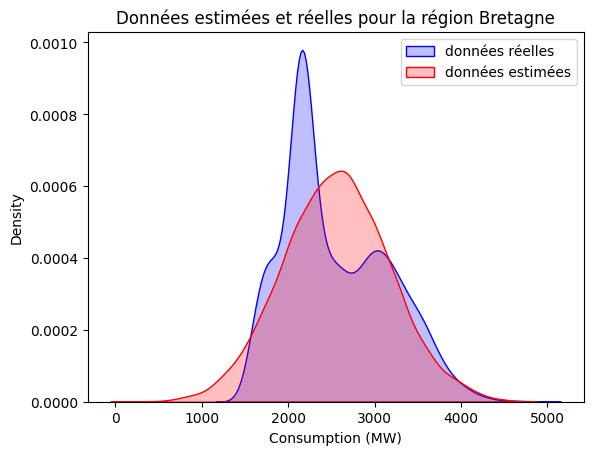

In [ ]:
mu, sigma_square = param(df_region)
new_df = generate_new_data(mu, sigma_square, df_region)
new_data = pd.read_csv("news_data.csv")
sns.kdeplot(data=df_region, x="consumption", label="données réelles", color='blue', fill=True)
sns.kdeplot(new_data, x="consumption", label="données estimées", color='red', fill=True)
plt.title("Données estimées et réelles pour la région Bretagne")
plt.xlabel("Consumption (MW)")
plt.legend()
plt.show()

5. Répétez la même procédure pour les jours d'hiver (du 22/12 au 21/03), après avoir mis à jour le modèle.

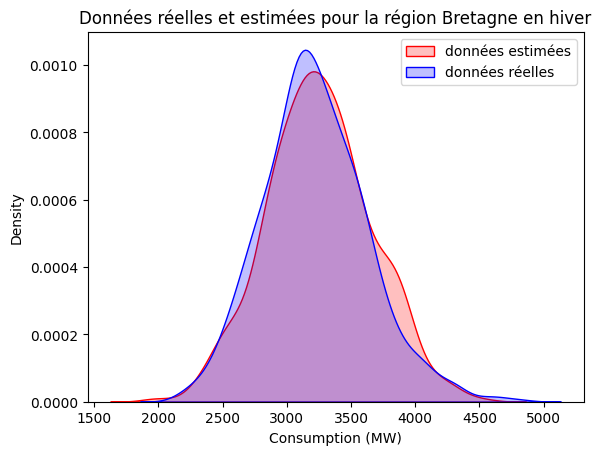

In [ ]:
def generate_new_winter_data(df1):
  winter_data = pd.DataFrame()
  #on parcourt les années
  for year in range(2013, 2021):
      start_date = pd.to_datetime(f'{year}-12-22')
      end_date = pd.to_datetime(f'{year + 1}-03-21')
      winter_data = pd.concat([winter_data, df1[(df1['date'] >= str(start_date)) & (df1['date'] <= str(end_date))]])
  mu, sigma_square = param(winter_data)
  new_winter_data = generate_new_data(mu, sigma_square, winter_data)
  return winter_data, new_winter_data

w_data, new_w_data = generate_new_winter_data(df_region)
w_data.to_csv('true_winter_data.csv', index=False)
new_w_data.to_csv('estimate_winter_data.csv', index=False)
sns.kdeplot(data=pd.read_csv('estimate_winter_data.csv'), x="consumption", label="données estimées", color='red', fill=True)
sns.kdeplot(data=pd.read_csv('true_winter_data.csv'), x="consumption", label="données réelles", color='blue', fill=True)
plt.title("Données réelles et estimées pour la région Bretagne en hiver")
plt.xlabel("Consumption (MW)")
plt.legend()
plt.show()

6. Dans quel des cas l'hypothèse gaussienne est plus appropriée ?

Il semblerait que l'hypothèse gaussienne est plus appropriée dans le cas où l'on prend en compte seulement la période d'Hiver.

## B. Goodness of fit

On souhaite confirmer et quantifier l'observation de la partie A.

Nous proposons la mesure de dissimilarité suivante, qui se base sur deux fonctionnes de répartitions $f$ et $g$:
$$
d(f, g) = \frac 1 2 \int |f(x) - g(x)| \mathrm dx.
$$

1. Montrez que $d(f,g) \in [0,1]$, avec $d(f,g)=0$ si et seulement si $f=g$ presque partout (pour la mesure de Lebesgue) et $d(f,g)=1$ si et seulement si $f$ et $g$ possèdent des supports disjoints.

On a $|f(x) - g(x)| \ge 0, \forall x \in \mathbb{R}$, d'où $d(f,g) \ge 0$.

On a $\forall x \in \mathbb{R}, |f(x) - g(x)| \le |f(x)| + |g(x)|$ d'où $d(f,g) \le \frac{1}{2} \big( \int |f(x)| dx + \int |g(x)| dx \big) = \frac{1}{2} \big( \int f(x) dx + \int g(x) dx \big) = \frac{1}{2}(1 + 1) = 1$ car f et g sont positives ou nulles par définiton d'une fonction de répartition.

Si d(f,g) = 0 alors $|f(x) - g(x)| = 0, \forall x \in \mathbb{R}$ car $|f(x) - g(x)| \ge 0$ donc  $f=g$ presque partout. On peut faire le raisonnement dans l'autre sens et facilement prouver la réciproque.

Si d(f,g) = 1 alors $\int |f(x) - g(x)| \mathrm dx = 2$ donc $\int |f(x) - g(x)| \mathrm dx = \int |f(x)| dx + \int |g(x)| dx$ ainsi $\forall x \in \mathbb{R}$ tel que $f(x)\neq 0$, on a $g(x) = 0$ et vice versa. Donc $f$ et $g$ sont à supports disjoints.

Si $f$ et $g$ sont à supports disjoints, on pose $D_f$ le support de $f$ et $D_g$ celui de $g$, on a:
$$2d(f,g) = \int_{D_f} |f(x) - g(x)|dx + \int_{D_g} |f(x) - g(x)|dx + \int_{\mathbb{R}\backslash(D_f \cap D_g)} |f(x) - g(x)|dx = \int_{D_f} |f(x)|dx + \int_{D_g} |g(x)|dx = 2$$
Donc $d(f,g) = 1$.

2. Pour la région Bretagne, calculez la dissimilarité entre le *kde* des données réelles et de la densité du modèle gaussien.

La dissimilarité entre le kde des données réelles et de la densité du modèle gaussien vaut 0.17371943834625878


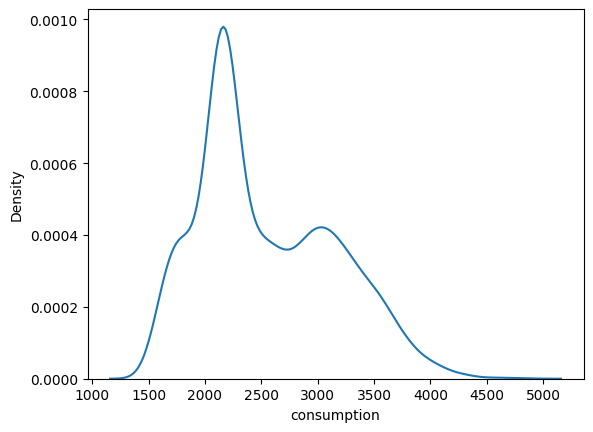

In [ ]:
def dissimilarity(real, mu, sigma):
  kde_data = sns.kdeplot(data=real, x='consumption').get_lines()[0].get_data()
  #kde des données réelles
  x_real_kde, y_real_kde = kde_data[0], kde_data[1]
  #densité du model gaussien
  absolute_difference = []
  for i in range(len(x_real_kde)):
    absolute_difference.append(np.abs(y_real_kde[i] - 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((x_real_kde[i] - mu) / sigma) ** 2)))
  absolute_difference = np.squeeze(absolute_difference)
  # on utilise np.trapz pour calculer l'intégrale
  dissimilarity = 0.5 * np.trapz(absolute_difference, x_real_kde)
  return dissimilarity

mu, sigma_square = param(df_region)
dissimilarity_value = dissimilarity(df_region, mu, np.sqrt(sigma_square))
print("La dissimilarité entre le kde des données réelles et de la densité du modèle gaussien vaut",dissimilarity_value)

3. Répétez la même procedure pour la région Bretagne en hiver et verifiez votre conclusion de la partie A.

La dissimilarité entre le kde des données réelles et de la densité du modèle gaussien vaut 0.03915949546343331


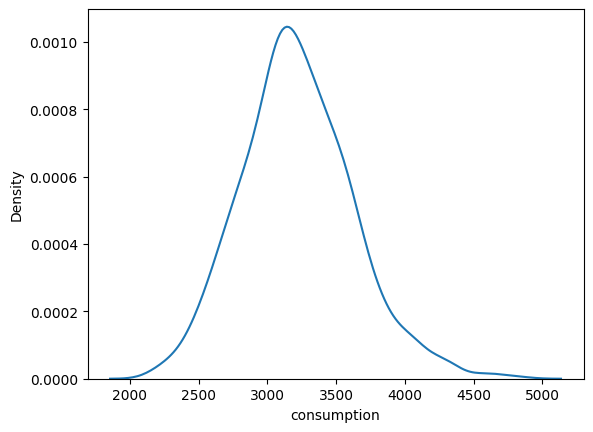

In [ ]:
def winter_dissimilarity(real_winter, mu, sigma):
  kde_data = sns.kdeplot(data=real_winter, x='consumption').get_lines()[0].get_data()
  #kde des données réelles
  x_real_kde, y_real_kde = kde_data[0], kde_data[1]
  #densité du model gaussien
  absolute_difference = []
  for i in range(len(x_real_kde)):
    absolute_difference.append(np.abs(y_real_kde[i] - 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((x_real_kde[i] - mu) / sigma) ** 2)))
  absolute_difference = np.squeeze(absolute_difference)
  dissimilarity = 0.5 * np.trapz(absolute_difference, x_real_kde)
  return dissimilarity

winter_data, new_winter_data = generate_new_winter_data(df_region)
mu, sigma_square = param(winter_data)
dissimilarity_value = dissimilarity(winter_data, mu, np.sqrt(sigma_square))
print("La dissimilarité entre le kde des données réelles et de la densité du modèle gaussien vaut",dissimilarity_value)

4. Répétez la même procedure pour toutes régions. Présentez le résultat dans un seul dataframe.

,région,dissimilarity,winter_dissimilarity
0,Auvergne-Rhône-Alpes,0.164318,0.527329
1,Bourgogne-Franche-Comté,0.500256,0.500617
2,Bretagne,0.503015,0.511737
3,Centre-Val de Loire,0.500033,0.500028
4,Grand Est,0.607155,0.462090
5,Hauts-de-France,0.474798,0.345894
6,Normandie,0.543339,0.691867
7,Nouvelle-Aquitaine,0.595757,0.435242
8,Occitanie,0.652270,0.664416
9,Pays de la Loire,0.538706,0.668753


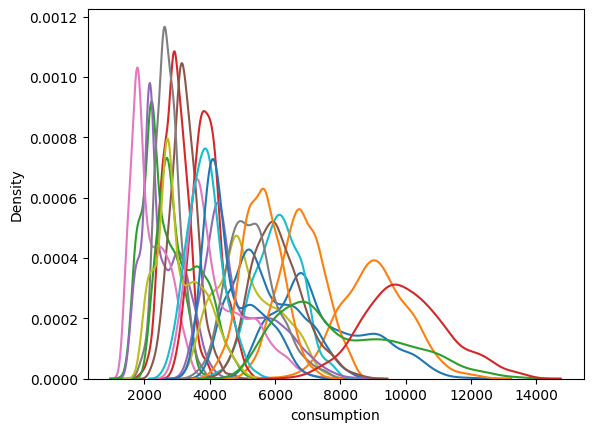

In [ ]:
def all_regions_dissimilarity():
  all_region_dissimilarity_df = pd.DataFrame(columns=["région", "dissimilarity", "winter_dissimilarity"])
  for region in list(df.region.unique()):
    df1 = df[df.region == region]
    mu, sigma_square = param(df1)
    dissimilarity_value = dissimilarity(df1, mu, np.sqrt(sigma_square))
    #idem avec l'hiver
    winter_data, new_winter_data = generate_new_winter_data(df1)
    mu_winter, sigma_square_winter = param(winter_data)
    winter_dissimilarity_value = dissimilarity(winter_data, mu_winter, np.sqrt(sigma_square_winter))
    all_region_dissimilarity_df = pd.concat([all_region_dissimilarity_df, pd.DataFrame({"région": region, "dissimilarity": dissimilarity_value, "winter_dissimilarity": winter_dissimilarity_value}, index=[0])], ignore_index=True)
  return all_region_dissimilarity_df

all_regions_dissimilarity()

5. Quelle région a le meilleur *fit* avel le modèle gaussien en hiver ?

Il s'agit de Haut de France

6. Pour ces région et saison, tracez le *kde* des données réelles et le *kde* des données générées sur le même graphique.

In [ ]:
for region in list(df.region.unique()):
   df1 = df[df.region == region]
   mu, sigma_square = param(df1)
   new_df = generate_new_data(mu, sigma_square, df1)
   new_data = pd.read_csv("news_data.csv")
   sns.kdeplot(data=df1, x="consumption", label=str("données réelles " + region), color='blue', fill=True)
   sns.kdeplot(new_data, x="consumption", label=str("données estimées " + region), color='red', fill=True)
   plt.title(str("Données estimées et réelles pour la région " + region + " sur toute l'année"))
   plt.xlabel("Consumption (MW)")
   plt.legend()
   plt.show()

   #hiver

   w_data, new_w_data = generate_new_winter_data(df1)
   w_data.to_csv('true_winter_data.csv', index=False)
   new_w_data.to_csv('estimate_winter_data.csv', index=False)
   sns.kdeplot(data=pd.read_csv('estimate_winter_data.csv'), x="consumption", label=str("données estimées " + region), color='red', fill=True)
   sns.kdeplot(data=pd.read_csv('true_winter_data.csv'), x="consumption", label=str("données réelles " + region), color='blue', fill=True)
   plt.title(str("Données estimées et réelles pour la région " + region + " en hiver"))
   plt.xlabel("Consumption (MW)")
   plt.legend()
   plt.show()


## C. Statistique bayésienne

On souhaite inclure la connaissance a priori sur l'estimation, en utilisant la statistique bayésienne.

Considérez la région Bretagne en hiver. On se focalise sur la moyenne $\mu$, en supposant que l'écart-type est connu et egal à $\sigma=400$MW. Supposons la loi a priori sur $\mu$ avec moyenne $\mu_0=3500$MW et l'écart-type $\sigma_0=500$MW.

1. Donnez la loi a posteriori pour $\mu$, en utilisant les paramètres $\sigma$, $\mu_0$, $\sigma_0$ et $n$ observations $x_1,\ldots,x_n$.

La loi a priori $\pi \sim \mathcal{N}(\mu_0, \sigma_0^2)$.
Les observations $x_i$ sont indépendantes et suivent une distribution normale avec une moyenne $\mu$ et un écart-type $\sigma$.
En utilisant la formule de la loi à posteriori, on a $\mu \sim \mathcal{N}(\mu_p, \sigma_p^2)$ avec:

$$\mu_p = \frac{\frac{\mu_0}{\sigma_0^2} + \frac{\sum x_i} {\sigma^2}}{1 / (\sigma_0^2) + \sum(1 / \sigma^2)}$$

$$\sigma_p = \frac{1}{\sqrt{\frac{1}{\sigma_0^2}+ \sum\frac{1}{\sigma^2}}}$$

2. Donnez les paramètres de la loi a posteriori obtenue pour chaque année de 2013 au 2023, considérée independament, dans un seul dataframe.

In [ ]:
def param_posteriori_law(mu_0 = 3500, sigma_0 = 500, sigma = 400): #au cas ou on veut changer ces paramètres
    df['date'] = pd.to_datetime(df['date'])
    param_posteriori_df = pd.DataFrame(columns=["year", "mean", "variance"])
    for year in range(2013, 2024):
      df1 = df[df['date'].dt.year == year]
      n = df1[["consumption"]].count().astype(int)
      mean_value = ((mu_0/(sigma_0**2)) + (df1[["consumption"]].sum().astype(int)/(sigma**2))) / ((1/(sigma_0**2)) + (n/(sigma**2)))
      variance_value = 1 / (((1/(sigma_0**2)) + (n/(sigma**2))))
      param_posteriori_df = pd.concat([param_posteriori_df, pd.DataFrame({"year": year, "mean": mean_value, "variance": variance_value})], ignore_index=True)
    return param_posteriori_df

param_posteriori_law()

,year,mean,variance
0,2013,4680.591877,36.524343
1,2014,4397.672714,36.524343
2,2015,4500.441260,36.524343
3,2016,4556.086317,36.424565
4,2017,4556.483299,36.524343
5,2018,4522.961485,36.524343
6,2019,4474.984021,36.524343
7,2020,4226.956910,36.424565
8,2021,4443.779219,36.524343
9,2022,4276.362586,36.524343


Lorsqu'on regarde les variances, le résultat est logique. En effet, la vraiance dépend seuelment du nombre de jours dans l'année, ce sont tous les mêmes exceptés les années bisextiles: 2016 et 2020, ainsi que l'année 2023 car les données ne sont pas complètes: moins de données implique une diminution du dénominateur et donc une augmentation de la variance.

3. Tracez la densité de la loi a posteriori en 2023 et le *kde* des données réelles en 2023, sur le même graphique.

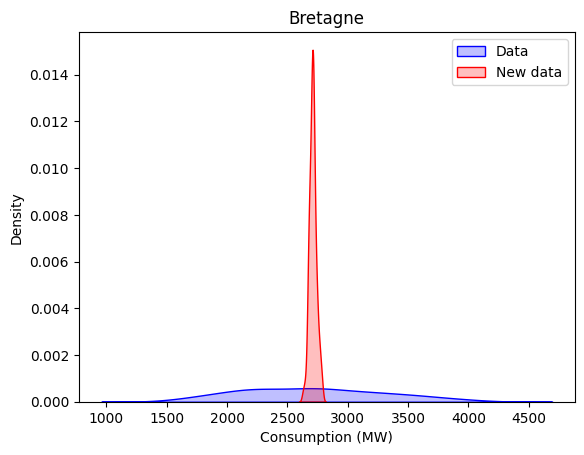

In [ ]:
start_date = '2023-01-1'
end_date = '2023-12-31'
mu_0 = 3500
sigma_0 = 500
sigma = 400

selected_data = df_region[((start_date <= df_region['date']) & (df_region['date']<= end_date))]
n = selected_data[["consumption"]].count().astype(int)
mean_value = ((mu_0/(sigma_0**2)) + (selected_data[["consumption"]].sum().astype(int)/(sigma**2))) / ((1/(sigma_0**2)) + (n/(sigma**2)))
std_value = 1 / (np.sqrt(((1/(sigma_0**2)) + (n/(sigma**2)))))
sns.kdeplot(data=selected_data, x="consumption", label="Data", color='blue', fill=True)
nouvelles_donnes_2023 = np.random.normal(loc=mean_value, scale=std_value, size=selected_data[["consumption"]].count().astype(int))
nouveau_dataframe_2023 = pd.DataFrame({
    "region": selected_data["region"],
    "date": selected_data["date"],
    "consumption": nouvelles_donnes_2023
})
nouveau_dataframe_2023.to_csv("news_data_bretagne_2023.csv", index=False)
new_data_2023 = pd.read_csv("news_data_bretagne_2023.csv")
sns.kdeplot(new_data_2023, x="consumption", label="New data", color='red', fill=True)
plt.title("Bretagne")
plt.xlabel("Consumption (MW)")
plt.legend()
plt.show()


4. Discutez les résultats, en les comparant avec ceux obtenus dans la partie A.

L'approche par la statistique bayésienne semble beaucoup moins efficace que celle par les estimateurs usuels.

## D. Test d'hypothèse

Considérez la région Bretagne. Alors que l'écart-type en hiver est egal à 400MW, vous souhaitez tester l'hypothèse que c'était 500MW en 2023. La moyenne est supposée connue et egal à 3200MW.

1. Proposez la statisque du test pour un niveau $\alpha$.

Nous sommes face à un test d'hypothèse. On définit l'hypothèse nulle : $\mathcal{H}_0 : \sigma = 500$ et l'hypothèse alternative par $\mathcal{H}_1 : \sigma = 400$.

On calcule le rapport de vraisemblance: $\lambda (x) = \frac{f_0(x)}{f_1(x)}$ où $f_0$ est la densité associée à l'hypothèse $\mathcal{H}_0$ et $f_1$ celle associée à l'hypothèse $\mathcal{H}_1$. On a:

 $$f_0(x) = \frac{1}{(500\sqrt{2\pi})^n}exp\big(-\frac{\sum_{i=1}^n(x_i-3200)^2}{500000}\big)$$
 et
 $$f_1(x) = \frac{1}{(400\sqrt{2\pi})^n}exp\big(-\frac{\sum_{i=1}^n(x_i-3200)^2}{320000}\big)$$

 D'où:

 $$\lambda (x) = 0.8^n exp\big((\frac{1}{500000} - \frac{1}{320000})\sum_{i=1}^n(x_i-3200)^2\big)$$

2. Donnez le résultat de ce test pour $\alpha=1\%$.

In [ ]:
#On cherche la valeur critique

n = df_region[["consumption"]].count().astype(int)
critical_value = chi2.ppf(0.99, n) #le degré est 1 car le test est unilatéral
lambda_x = 0.8**n * np.exp(((1/500000)-(1/320000)) * ((df_region[["consumption"]].astype(int) - 3200)**2).sum().astype(int))

#règle de décision

if (lambda_x > critical_value).all():
    print("Rejeter l'hypothèse nulle : L'écart-type n'était pas de 500 MW en 2023.")
else:
    print("Ne pas rejeter l'hypothèse nulle : L'écart-type était de 500 MW en 2023.")

Ne pas rejeter l'hypothèse nulle : L'écart-type était de 500 MW en 2023.


## E. Test d'indépendence

Considérez la consomation d'electicité en Bretagne et en Provence-Alpes-Côte d'Azur en hiver.

1. Visualisez la loi jointe de la consomation dans ces 2 régions en utilisant la librarie **seaborn**.

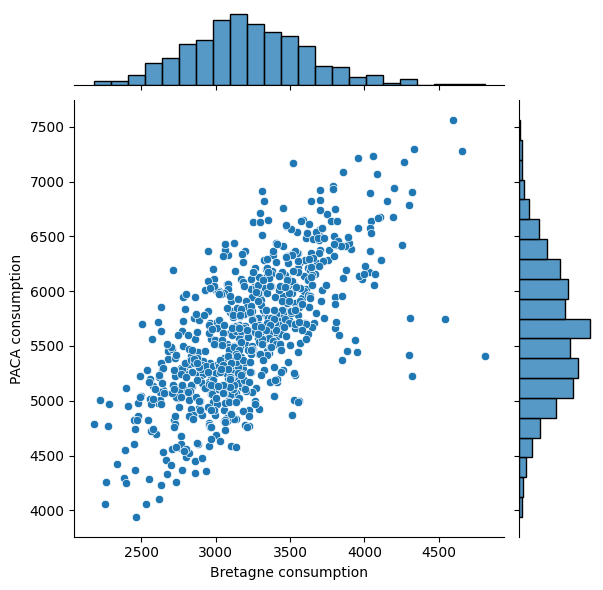

In [ ]:
real_bretagne, estimate_bretagne = generate_new_winter_data(df_region)
df_paca = df[df.region == "Provence-Alpes-Côte d'Azur"]
real_paca, estimate_paca = generate_new_winter_data(df_paca)
real_consumption_bretagne = real_bretagne[['consumption']]
real_consumption_paca = real_paca[['consumption']]
real_consumption_bretagne.reset_index(drop=True, inplace=True)
real_consumption_paca.reset_index(drop=True, inplace=True)

df_combined = pd.DataFrame()
df_combined['Bretagne consumption'] = real_consumption_bretagne
df_combined['PACA consumption'] = real_consumption_paca

sns.jointplot(data=df_combined, x='Bretagne consumption', y='PACA consumption', kind='scatter')

2. Est-ce que vous pensez que la consomation dans ces 2 régions est indépendante ?

Les points montrent une tendance à se positionner sur une droite diagonale ainsi on peut dire qu'il y a une corrélation entre la consommation des deux régions. Ces données ne sont donc pas indépendantes.

3. Proposez le test du Chi-2 pour l'indépendance de la consomation dans ces deux régions pour un niveau $\alpha$.

On pose: $\mathcal{H}_0 = \{X \perp Y\}$ et $\mathcal{H}_1 = \{X \not\perp Y\}$ où $X$ et $Y$ sont les consommations de la Bretagne et de la région PACA respectivement. On pose N le nombre de données que l'on possède i.e. la longueur des datas associées à X et Y. on pose I le nombre de valeurs différentes de valeurs différentes de X et J celui de Y.

On pose: $O_{i+} = \sum_{j=1}^J O_{ij}$ (nombre de données pour lesquelles X = i), $O_{+j} = \sum_{i=1}^I O_{ij}$ (nombre de données pour lesquelles Y = j) et $E_{ij} = \frac{O_{i+} \times O_{+j}}{N}$.


Alors la loi $T = \sum_{i,j} \frac{(O_{ij}-E_{ij})^2}{E_{ij}} \sim \chi^2((I-1)(J-1))$

Etant donné un risque $\alpha$, on compare T à la valeur critique en alpha, si T est inférieur à la valeur critique alors on accepte $\mathcal{H}_0$ sinon on la refuse.

4. Donnez le résultat de ce test pour $\alpha=1\%$.

In [ ]:
real_bretagne, estimate_bretagne = generate_new_winter_data(df_region)
df_paca = df[df.region == "Provence-Alpes-Côte d'Azur"]
real_paca, estimate_paca = generate_new_winter_data(df_paca)
real_consumption_bretagne = real_bretagne[['consumption']]
real_consumption_paca = real_paca[['consumption']]
real_consumption_bretagne.reset_index(drop=True, inplace=True)
real_consumption_paca.reset_index(drop=True, inplace=True)

#calcul de T

N = len(real_consumption_paca)

i_values = np.unique(real_consumption_bretagne)
j_values = np.unique(real_consumption_paca)

Oij = np.zeros((len(i_values), len(j_values),))

for n in range(N):
    i_index = np.where(i_values == real_bretagne.iloc[n]['consumption'])[0][0]
    j_index = np.where(j_values == real_paca.iloc[n]['consumption'])[0][0]
    Oij[i_index, j_index] += 1

Oi_plus = np.sum(Oij, axis=1)
O_plus_j = np.sum(Oij, axis=0)
Eij = np.outer(Oi_plus / N, O_plus_j / N)

T = np.sum(((Oij - Eij) ** 2) / Eij)

#on cherche la valeur critique

degree_of_freedom = len(i_values) * len(j_values)
alpha = 0.01
critical_value = chi2.ppf(1 - alpha, degree_of_freedom)

#règle de décision

if T < critical_value:
    print("Accepter H0 : Les variables X et Y sont indépendantes.")
else:
    print("Rejeter H0 : Les variables X et Y ne sont pas indépendantes.")


Rejeter H0 : Les variables X et Y ne sont pas indépendantes.


## F. Intervalle de confiance

Considérez la région Bretagne en hiver.

1. Donnez l'intervalle de confiance pour un niveau $\alpha=95\%$ pour la moyenne consomation d'electricité.

In [ ]:
# data de la bretagne en hiver, calcul des paramètres
real_winter_bretagne, estimate_winter_bretgane = generate_new_winter_data(df_region)
mu, sigma_square = param(real_winter_bretagne)
n = real_winter_bretagne[["consumption"]].count().astype(int)

alpha = 0.05 #car 95%

z_critical = norm.ppf(1 - alpha/2)
margin_error = z_critical * (np.sqrt(sigma_square) / np.sqrt(n))
confidence_interval = (mu - margin_error, mu + margin_error)

lower_bound = confidence_interval[0]["consumption"]
upper_bound = confidence_interval[1]["consumption"]

print(f"Intervalle de confiance (95%): [{lower_bound}, {upper_bound}]")


Intervalle de confiance (95%): [3187.6216687438487, 3247.0786113681966]


2. Donnez le résultat du test de Student pour un niveau $5\%$ pour l'hypothèse null que la moyenne consomation en 2023 est egal à 3100MW.

In [ ]:
#Exceptionnellement pour la question
import scipy

mu = 3100  # Hypothèse nulle : la moyenne consommation en 2023 est de 3100 MW
alpha = 0.05
#On considère l'hiver à cheval sur 2022 et 2023
start_date = '2022-12-22'
end_date = '2023-03-21'

selected_data = df_region[((start_date <= df_region['date']) & (df_region['date']<= end_date))]
n = selected_data[["consumption"]].count().astype(int)
x_bar, sigma_square = param(selected_data)

t = (x_bar - mu) / (np.sqrt(sigma_square) / (n ** 0.5))

#on cherche la valeur critique

c = scipy.stats.t.ppf(1 - alpha, n-1)

#règle de décision

if  (t < -c).all():
    print("Rejeter l'hypothèse nulle : La moyenne consommation en 2023 n'est pas égale à 3100 MW.")
else:
    print("Ne pas rejeter l'hypothèse nulle : La moyenne consommation en 2023 est égale à 3100 MW.")


Ne pas rejeter l'hypothèse nulle : La moyenne consommation en 2023 est égale à 3100 MW.
